### Transformata Hougha w przestrzeni ab - Domowe
Przestrzeń ρ,θ nie jest jedyną przestrzenią w której punkt odpowiada parametrom prostej. Np. można spróbować wykorzystać tradycyjne równanie prostej:

y=ax+b

W tej przestrzeni reprezentacją pęku prostych jest prosta. 

Zadanie: napisać funkcję, która jako argument przyjmuje obraz (binarny) oraz parametry:

- aMin - minimalna wartość parametru a
- aMax - maksymalna  wartość parametru a
- aSkok - skok parametru a
- bMin - minimalna wartość parametru b
- bMax  - maksymalna  wartość parametru b
- bSkok - skok parametru b
Jako wynik ma zwrócić macierz przestrzeni Hougha ab.

Uwagi:

- zadanie może wyglądać na skomplikowane ale tak na prawdę wymaga tylko starannego przemyślenia
- najważniejszy jest problem "adresowania" macierzy H. Można do tego wykorzystać dwa wektory A i B ze wszystkimi możliwymi wartościami jakie parametry a i b mogę przyjąć (w podanych zakresach z podanym skokiem). Wówczas indeksy tych wektorów będą współrzędnymi w macierzy H. Do stworzenia wektorów wykorzystaj funkcję _np.arange_
- na podstawie rozmiaru wektorów A i B (własność _shape_) należy stworzyć wyzerowaną macierz H (funkcja _np.zeros_)
- dla każdego punktu krawędzi na obrazie należy:
    - używająć wektora A dla każdej z jego wartości a obliczyć odpowiednią wartość b - indeksy kolejnych wartości a (a_idx) będą jedną z współrzędnych macierzy H, natomiast drugą współrędną mozna uzyskać jako b_idx = np.argmin(abs(B - b)).
        - każde a_idx i b_idx wyznaczą punkt w macierzy H, który należy zinkrementować
- działanie funkcji należy przetestować na punktach generowanych w 'edytorku' z punktu "Transformacja Hougha dla małej liczby punktów". Proponowane parametry funkcji:
    - aMin: -5
    - aMax:  5
    - aSkok: 0.05 
    - bMin: -100
    - bMax:  100
    - bSkok: 1

Zastanów się w przypadku jakich prostych reprezentacja ab nie sprawdzi się.

In [49]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import requests


url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/'

fileNames = ["dom.png", "kwadraty.png", "lab112.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

def load_image(image_name, grayscale=True):
    image = cv2.imread(image_name)
    if grayscale:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

def display(*images, size=5):
    plt.gray()
    n = len(images)
    fig, ax = plt.subplots(1, n, squeeze=False)
    fig.set_size_inches(size*n, size)
    for i, image in enumerate(images):
        ax[0][i].imshow(image)
        ax[0][i].axis('off')
    plt.show()

In [50]:
def ab_transform(image_c, a_min=-5, a_max=5, a_step=0.05, b_min=-100, b_max=100, b_step=1):
    image = image_c.copy()
    a_space = np.arange(a_min, a_max, a_step)
    b_space = np.arange(b_min, b_max, b_step)
    m, n = a_space.shape[0], b_space.shape[0]

    hough = np.zeros((m, n)).astype(np.int32)
    for x, y in zip(*np.where(image > 0)):
        for a_ind, a_value in enumerate(a_space):
            b_ind = np.argmin(np.abs(y - b_space - a_value*x))
            hough[a_ind, b_ind] += 1

    display(image, hough)

In [56]:
im = np.zeros((64,64), dtype=np.uint8)

im[18, 31] = 1
im[10, 10] = 1

<Figure size 640x480 with 0 Axes>

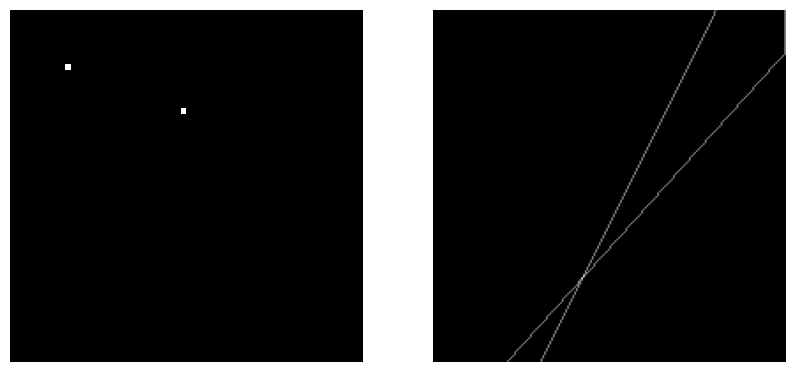

In [57]:
ab_transform(im)

<Figure size 640x480 with 0 Axes>

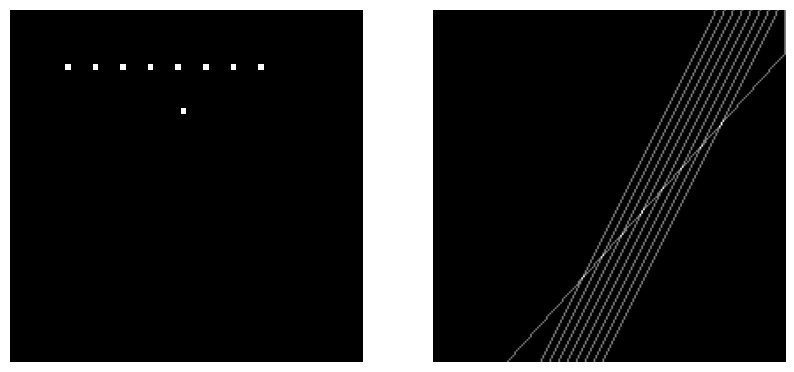

In [58]:
for i in range(10, 50, 5):
    im[10, i] = 1

ab_transform(im)

<Figure size 640x480 with 0 Axes>

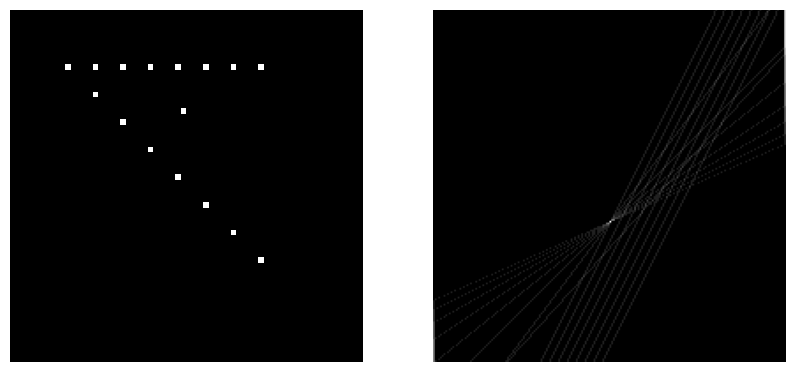

In [59]:
for i in range(10, 50, 5):
    im[i, i] = 1

ab_transform(im)